In [356]:
#import necessary libaries
import pandas as pd
import os
import seaborn as sns

In [357]:
#importing all the list of the dat in one datframe
path = "SalesAnalysis/Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

df = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    df = pd.concat([df, current_data])
    
df.to_csv("all_data_copy.csv", index=False)

In [358]:
#checking the first five rows of the Dataframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [359]:
#Grabing the info about the dataframe contains
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


**First cleaning the data frame inorder to evalute the resullt**

In [360]:
#checking the NAN vslue in dataframe
nan_value = df[df.isna().any(axis=1)]
display(nan_value)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
12567,NaN,NaN,NaN,NaN,NaN,NaN
12640,NaN,NaN,NaN,NaN,NaN,NaN
12659,NaN,NaN,NaN,NaN,NaN,NaN
12732,NaN,NaN,NaN,NaN,NaN,NaN


In [361]:
#droping all the NAN vlaue form the dataframe

df = df.dropna(how='all')


In [362]:
#dataframe without NAN value
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
13617,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
13618,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
13619,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
13620,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


Calculating expensive month of price

In [363]:
df[['Date','Time']] = df['Order Date'].str.split(' ',expand=True)

In [364]:
#df_split= pd.DataFrame(df['Order Date'].str.split(' ',1).tolist(),columns=['Date','Time'])

In [365]:
#df_split.head()

In [366]:
#df['Date'] = df_split.str.get(0)
#df['Time'] = df.split.str.get(1)

In [367]:
#checking new seperate and added date and time columns in dateframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12/30/19,00:01
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12/29/19,07:03
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12/12/19,18:21
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12/22/19,15:13
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12/18/19,12:38


In [368]:
#Removing the string Or from the Date columns
df= df [df['Date'].str[0:2]!= 'Or']

In [369]:
#df['Date ']= pd.to_datetime(df['Date'])

In [370]:
#Extracting the month fromthe date
df['month'] = df['Date'].str[0:2]

<ipython-input-370-93aabe9578ca>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['Date'].str[0:2]


In [371]:
#checking the new month column in the dateframe
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12/30/19,00:01,12
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12/29/19,07:03,12
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12/12/19,18:21,12
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12/22/19,15:13,12
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12/18/19,12:38,12


In [372]:
#converting the Price Each and Quantity Orderd in numeric data and  multplying the the orede and price and putting them in new column name sales
df['Sales'] = df['Qauantity Ordered'] = df['Quantity Ordered'].astype('float')*df['Price Each'].astype('float')


<ipython-input-372-e28612d170f7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'] = df['Qauantity Ordered'] = df['Quantity Ordered'].astype('float')*df['Price Each'].astype('float')


In [373]:
#Checking the type of the Price Each Column
type(df['Price Each'].iloc[0])



str

In [374]:
#Checking the type of the Quantity Ordered Column
type(df['Qauantity Ordered'].iloc[0])

numpy.float64

In [375]:
#checking the first five dataframe to see the result in the new column Sales
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Time,month,Sales,Qauantity Ordered
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12/30/19,00:01,12,1700.00,1700.00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12/29/19,07:03,12,600.00,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12/12/19,18:21,12,11.95,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12/22/19,15:13,12,149.99,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12/18/19,12:38,12,11.95,11.95


**What month have the highest number of sales amount**

In [376]:
#Here all the dat from the df is group by month and make them total of all in the basis of the month 
result = df.groupby(['month']).sum()
result.head()

,Sales,Qauantity Ordered
month,,
01,1.822257e+06,1.822257e+06
02,2.202022e+06,2.202022e+06
03,2.807100e+06,2.807100e+06
04,3.390670e+06,3.390670e+06
05,3.152607e+06,3.152607e+06


In [377]:
#Sale_months=df.groupby(['month']).sum()['Sales']

In [378]:
#importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [379]:
#ploting bar graph btween the months and sales
 
months = range(1,13)

plt.bar(months,result['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()


TypeError: 'tuple' object is not callable

****What city have highest number of sales****

In [ ]:
#checking head of the dataframe to make easy to analysis below
df.head()

In [ ]:
#spliting the purchase address into street,city and postal code

df[['street','city','postal_code']] = df['Purchase Address'].str.split(',',expand=True)

In [ ]:
df.head()

In [ ]:
#>now lets do more exercise on droping and recrearing city columns with the state and the city,in the city there is two city insid the same state 
df.drop(columns=['street','city','postal_code'],inplace=True)

In [ ]:
df.head()

In [380]:
def get_state(address):
    return address.split(',')[1]

def get_city(address):
    return address.split(',')[2].split(' ')[1]

df['city'] = df['Purchase Address'].apply(lambda x: get_state(x)+ '  (' + get_city(x) + ')')


<ipython-input-380-04227f8109cc>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['city'] = df['Purchase Address'].apply(lambda x: get_state(x)+ '  (' + get_city(x) + ')')


In [381]:
df['city'].nunique()

10

In [382]:
#Grabing the highest city that made sales
city_result = df.groupby('city').sum()
city_result

,Sales,Qauantity Ordered
city,,
Atlanta (GA),2.795499e+06,2.795499e+06
Austin (TX),1.819582e+06,1.819582e+06
Boston (MA),3.661642e+06,3.661642e+06
Dallas (TX),2.767975e+06,2.767975e+06
Los Angeles (CA),5.452571e+06,5.452571e+06
New York City (NY),4.664317e+06,4.664317e+06
Portland (ME),4.497583e+05,4.497583e+05
Portland (OR),1.870732e+06,1.870732e+06
San Francisco (CA),8.262204e+06,8.262204e+06


ConversionError: Failed to convert value(s) to axis units: 0         New York City  (NY)
1         New York City  (NY)
2         New York City  (NY)
3         San Francisco  (CA)
4               Atlanta  (GA)
                 ...         
13617            Boston  (MA)
13618     New York City  (NY)
13619     San Francisco  (CA)
13620     San Francisco  (CA)
13621           Atlanta  (GA)
Name: city, Length: 185950, dtype: object

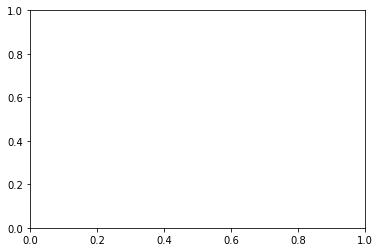

In [383]:
cities= df['city']
plt.bar=(cities,city_result['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylable('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

